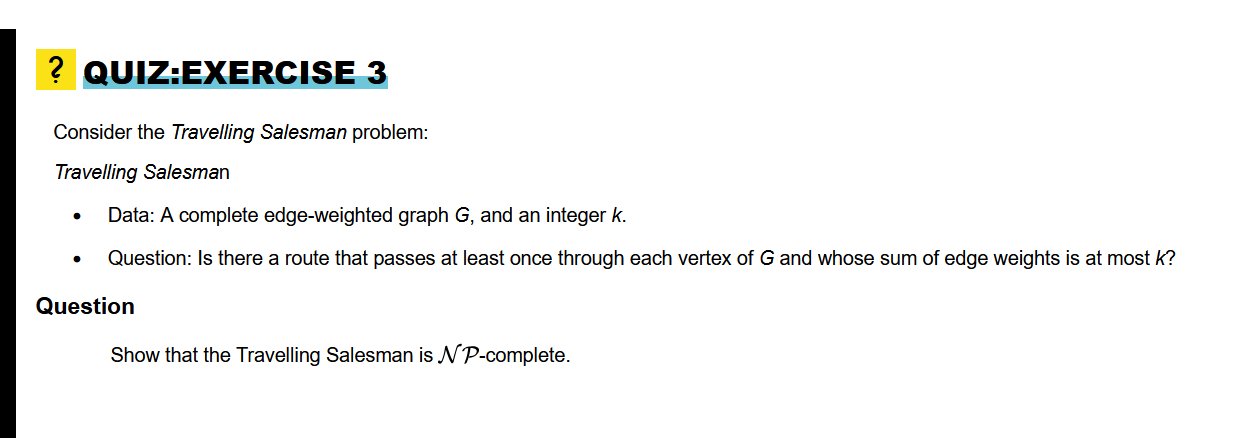

 Données : un graphe complet pondéré G=(V,E,w)et un entierk.

Question : existe-t-il un cycle passant une fois par chaque sommet (tour hamiltonien) dont la somme des poids ≤k ?

Montrer : TSP est NP-complet.

TSP appartient à NP !!

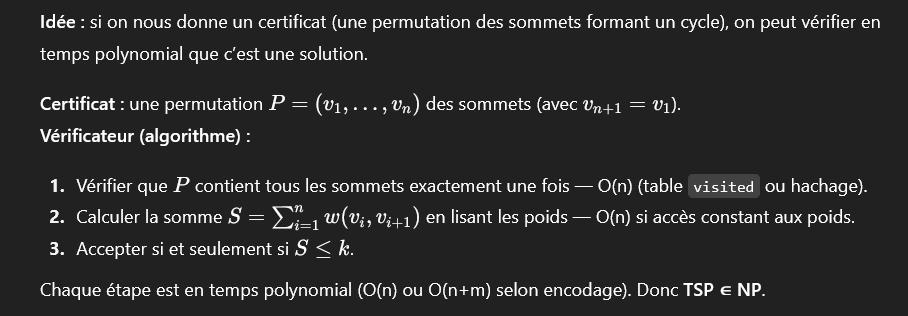

SP est NP-difficile (réduction polynomiale depuis Hamiltonian Cycle)

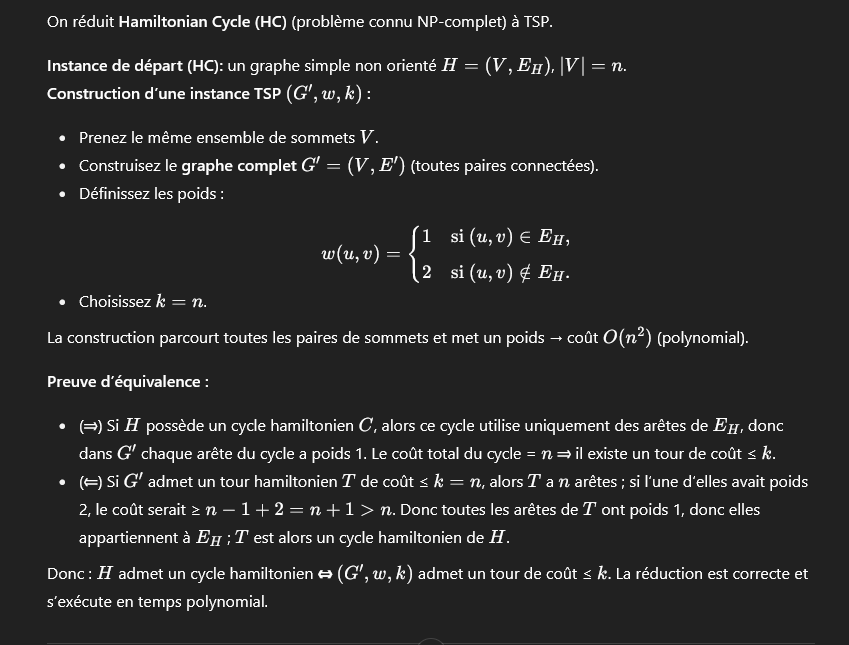

Conclusion

TSP ∈ NP (vérificateur polynomial).

HC ≤ₚ TSP (réduction polynomiale) ⇒ TSP est NP-difficile.

Donc TSP est NP-complet.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21152\3994758483.py:54: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21152\3994758483.py:54: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
c:\Users\Lenovo\Corbeille problème NP\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Lenovo\Corbeille problème NP\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


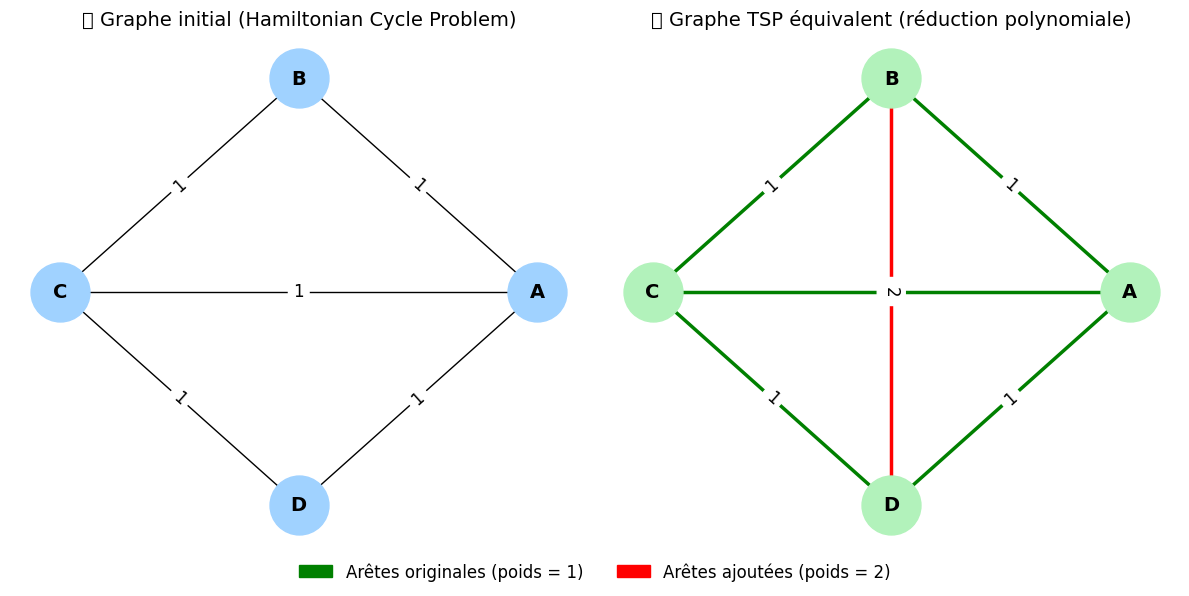

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Étape 1 : Graphe Hamiltonien de départ ---
H = nx.Graph()
H.add_edges_from([
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'),  # cycle possible
    ('A', 'C')  # arête en plus
])

# --- Étape 2 : Création du graphe complet pour TSP ---
G = nx.complete_graph(H.nodes())
weights = {}

for u, v in G.edges():
    if H.has_edge(u, v):
        weights[(u, v)] = 1  # arête existante → coût faible
    else:
        weights[(u, v)] = 2  # arête ajoutée → coût élevé

nx.set_edge_attributes(G, weights, "weight")

# --- Étape 3 : Préparation des couleurs ---
colors = ['green' if weights[e] == 1 else 'red' for e in G.edges()]

# --- Étape 4 : Affichage ---
plt.figure(figsize=(12,6))

# Graphe Hamiltonien
plt.subplot(1,2,1)
pos1 = nx.circular_layout(H)
nx.draw(H, pos1, with_labels=True, node_color="#a0d2ff", node_size=1800, font_size=14, font_weight="bold")
nx.draw_networkx_edge_labels(H, pos1, edge_labels={(u,v):1 for (u,v) in H.edges()}, font_size=12)
plt.title("🔹 Graphe initial (Hamiltonian Cycle Problem)", fontsize=14)

# Graphe TSP
plt.subplot(1,2,2)
pos2 = nx.circular_layout(G)
nx.draw(G, pos2, with_labels=True, node_color="#b2f2bb", edge_color=colors, width=2.5,
        node_size=1800, font_size=14, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos2, edge_labels={(u,v):weights[(u,v)] for (u,v) in G.edges()}, font_size=12)
plt.title("🔸 Graphe TSP équivalent (réduction polynomiale)", fontsize=14)

# Légende
import matplotlib.patches as mpatches
plt.figlegend(
    handles=[
        mpatches.Patch(color='green', label='Arêtes originales (poids = 1)'),
        mpatches.Patch(color='red', label='Arêtes ajoutées (poids = 2)')
    ],
    loc='lower center', ncol=2, fontsize=12, frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
